## Tasks:

### 1. Understand the dataset:

Identify the shape of the dataset

Identify variables with null values

### 2. Perform basic data exploratory analysis:

Utilize missing value treatment

Analyze the date column and remove the entries if it has an incorrect timeline

Draw a frequency plot for city-wise complaints

Draw scatter and hexbin plots for complaint concentration across Brooklyn

### 3. Find major types of complaints:

Plot a bar graph of count vs. complaint types

Find the top 10 types of complaints

Display the types of complaints in each city in a separate dataset

 

### 4. Visualize the major types of complaints in each city

### 5. Check if the average response time across various types of complaints

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Identifying the shape of the dataset

In [3]:
df.shape

(300698, 53)

### Identifying variables with null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [5]:
df.head()

Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01-01-16 7:43   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01-01-16 3:24   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0    71 VERMILYEA AVENUE  ...                 NaN                      NaN   
1        27-07 23 AVENUE  ...                 NaN                      NaN   
2  2897 VALENTINE AVENUE  ...                 NaN                      NaN   
3    2940 BAISLEY AVENUE  ...                 NaN                      NaN   
4          87-14 57 ROAD  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   
2       NaN                    NaN             NaN             NaN   
3       NaN                    NaN             NaN             NaN   
4       NaN                    NaN             NaN             NaN   

  Ferry Terminal Name   Latitude  Longitude  \
0                 NaN  40.865682 -73.923501   
1                 NaN  40.775945 -73.915094   
2                 NaN  40.870325 -73.888525   
3                 NaN  40.835994 -73.828379   
4                 NaN  40.733060 -73.874170   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  
3   (40.83599404683083, -73.82837939584206)  
4  (40.733059618956815, -73.87416975810375)  

[5 rows x 53 columns]

In [6]:
df.isnull().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


In [7]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

### Utilize missing value treatment

In [8]:
#To get the total number of rows
df.shape[0]

300698

In [9]:
#Finding out if the null value percentage in a particular column is greater than 80 then we can drop the entries by using a filter
filter_null = ((df.isnull().sum()/df.shape[0])*100) > 80
filter_null

Unique Key                        False
Created Date                      False
Closed Date                       False
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                        False
Location Type                     False
Incident Zip                      False
Incident Address                  False
Street Name                       False
Cross Street 1                    False
Cross Street 2                    False
Intersection Street 1              True
Intersection Street 2              True
Address Type                      False
City                              False
Landmark                           True
Facility Type                     False
Status                            False
Due Date                          False
Resolution Description            False
Resolution Action Updated Date    False
Community Board                   False
Borough                           False


In [10]:
filter_null.values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False])

In [11]:
df_null_cols = df.loc[:, filter_null.values].columns
df_null_cols

Index(['Intersection Street 1', 'Intersection Street 2', 'Landmark',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name'],
      dtype='object')

In [12]:
#So converting the indexes into a list
del_cols_list = list(df_null_cols)
print("The list of columns is:", del_cols_list)
print("The type is:", type(del_cols_list))

The list of columns is: ['Intersection Street 1', 'Intersection Street 2', 'Landmark', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name']
The type is: <class 'list'>


In [13]:
#Dropping the columns
print("The shape before dropping the columns is:", df.shape)

The shape before dropping the columns is: (300698, 53)


In [14]:
df.drop(columns = del_cols_list, inplace = True)

In [15]:
print("The shape after dropping the columns is:", df.shape)

The shape after dropping the columns is: (300698, 39)


In [16]:
(df.isnull().sum()/df.shape[0])*100

Unique Key                         0.000000
Created Date                       0.000000
Closed Date                        0.719659
Agency                             0.000000
Agency Name                        0.000000
Complaint Type                     0.000000
Descriptor                         1.966757
Location Type                      0.043565
Incident Zip                       0.869643
Incident Address                  14.768971
Street Name                       14.768971
Cross Street 1                    16.388203
Cross Street 2                    16.554483
Address Type                       0.936155
City                               0.869311
Facility Type                      0.721987
Status                             0.000000
Due Date                           0.000998
Resolution Description             0.000000
Resolution Action Updated Date     0.727308
Community Board                    0.000000
Borough                            0.000000
X Coordinate (State Plane)      

In [17]:
#Dropping the columns where null values are more than 5% using a filter
filter_5p = ((df.isnull().sum()/df.shape[0])*100) > 5
df_5p_cols = df.loc[:, filter_5p.values].columns
df_5p_cols

Index(['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2'], dtype='object')

In [18]:
#The columns that we need to drop are as follows 
#Index(['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2'], dtype='object')
del_5p_cols_list = list(df_5p_cols)
del_5p_cols_list

['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2']

In [19]:
print("The shape before dropping the columns is:", df.shape)

The shape before dropping the columns is: (300698, 39)


In [20]:
df.drop(columns = del_5p_cols_list, inplace = True)

In [21]:
print("The shape after dropping the columns is:", df.shape)

The shape after dropping the columns is: (300698, 35)


In [22]:
(df.isnull().sum()/df.shape[0])*100

Unique Key                        0.000000
Created Date                      0.000000
Closed Date                       0.719659
Agency                            0.000000
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        1.966757
Location Type                     0.043565
Incident Zip                      0.869643
Address Type                      0.936155
City                              0.869311
Facility Type                     0.721987
Status                            0.000000
Due Date                          0.000998
Resolution Description            0.000000
Resolution Action Updated Date    0.727308
Community Board                   0.000000
Borough                           0.000000
X Coordinate (State Plane)        1.177261
Y Coordinate (State Plane)        1.177261
Park Facility Name                0.000000
Park Borough                      0.000000
School Name                       0.000000
School Numb

In [23]:
#Dropping the irrelevant columns
drop_columns = ['Agency Name','Address Type','Park Facility Name','Park Borough','School Name','School Number','School Region','School Code','School Phone Number','School Address','School City','School State','School Zip','School Not Found','X Coordinate (State Plane)','Y Coordinate (State Plane)','Community Board','Facility Type','Location']

In [24]:
df = df.drop(columns= drop_columns, axis = 1)

In [25]:
df.shape

(300698, 16)

In [26]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Due Date', 'Resolution Description', 'Resolution Action Updated Date',
       'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Complaint Type                  300698 non-null  object 
 5   Descriptor                      294784 non-null  object 
 6   Location Type                   300567 non-null  object 
 7   Incident Zip                    298083 non-null  float64
 8   City                            298084 non-null  object 
 9   Status                          300698 non-null  object 
 10  Due Date                        300695 non-null  object 
 11  Resolution Description          300698 non-null  object 
 12  Resolution Actio

In [30]:
#Now identifying the categorical and numerical data
cat_df = df.select_dtypes(exclude = np.number)
num_df = df.select_dtypes(include = np.number)

In [31]:
cat_df.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor',
       'Location Type', 'City', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Borough'],
      dtype='object')

In [32]:
num_df.columns

Index(['Unique Key', 'Incident Zip', 'Latitude', 'Longitude'], dtype='object')

In [33]:
#For getting the percentage of categorical data
(df[cat_df.columns].isnull().sum()/df[cat_df.columns].shape[0])*100

Created Date                      0.000000
Closed Date                       0.719659
Agency                            0.000000
Complaint Type                    0.000000
Descriptor                        1.966757
Location Type                     0.043565
City                              0.869311
Status                            0.000000
Due Date                          0.000998
Resolution Description            0.000000
Resolution Action Updated Date    0.727308
Borough                           0.000000
dtype: float64

In [34]:
#Using the fillna() method
for col in cat_df.columns:
    df[col].fillna(df[col].mode()[0], inplace = True)

In [35]:
#Checking whether categorical null values are treated
(df[cat_df.columns].isnull().sum()/df[cat_df.columns].shape[0])*100

Created Date                      0.0
Closed Date                       0.0
Agency                            0.0
Complaint Type                    0.0
Descriptor                        0.0
Location Type                     0.0
City                              0.0
Status                            0.0
Due Date                          0.0
Resolution Description            0.0
Resolution Action Updated Date    0.0
Borough                           0.0
dtype: float64

In [36]:
#Doing the same but with mean() for numerical data
(df[num_df.columns].isnull().sum()/df[num_df.columns].shape[0])*100

Unique Key      0.000000
Incident Zip    0.869643
Latitude        1.177261
Longitude       1.177261
dtype: float64

In [37]:
for col in num_df.columns:
    df[col].fillna(df[col].mean(), inplace = True)

In [38]:
#Checking whether numerical null values are treated
(df[num_df.columns].isnull().sum()/df[num_df.columns].shape[0])*100

Unique Key      0.0
Incident Zip    0.0
Latitude        0.0
Longitude       0.0
dtype: float64

In [39]:
(df.isnull().sum()/df.shape[0])*100

Unique Key                        0.0
Created Date                      0.0
Closed Date                       0.0
Agency                            0.0
Complaint Type                    0.0
Descriptor                        0.0
Location Type                     0.0
Incident Zip                      0.0
City                              0.0
Status                            0.0
Due Date                          0.0
Resolution Description            0.0
Resolution Action Updated Date    0.0
Borough                           0.0
Latitude                          0.0
Longitude                         0.0
dtype: float64

### Analyze the date column and remove the entries if it has an incorrect timeline

In [40]:
date_cols = ['Created Date','Due Date', 'Closed Date','Resolution Action Updated Date']
df[date_cols]

Created Date                Due Date  \
0       12/31/2015 11:59:45 PM           01-01-16 7:59   
1       12/31/2015 11:59:44 PM           01-01-16 7:59   
2       12/31/2015 11:59:29 PM           01-01-16 7:59   
3       12/31/2015 11:57:46 PM           01-01-16 7:57   
4       12/31/2015 11:56:58 PM           01-01-16 7:56   
...                        ...                     ...   
300693  03/29/2015 12:33:41 AM  03/29/2015 08:33:41 AM   
300694  03/29/2015 12:33:28 AM  03/29/2015 08:33:28 AM   
300695  03/29/2015 12:33:03 AM  03/29/2015 08:33:03 AM   
300696  03/29/2015 12:33:02 AM  03/29/2015 08:33:02 AM   
300697  03/29/2015 12:33:01 AM  03/29/2015 08:33:01 AM   

                   Closed Date Resolution Action Updated Date  
0                01-01-16 0:55                  01-01-16 0:55  
1                01-01-16 1:26                  01-01-16 1:26  
2                01-01-16 4:51                  01-01-16 4:51  
3                01-01-16 7:43                  01-01-16 7:43  
4                01-01-16 3:24                  01-01-16 3:24  
...                        ...                            ...  
300693           11-08-15 7:34                  11-08-15 7:34  
300694  03/29/2015 02:33:59 AM         03/29/2015 02:33:59 AM  
300695  03/29/2015 03:40:20 AM         03/29/2015 03:40:20 AM  
300696  03/29/2015 04:38:35 AM         03/29/2015 04:38:35 AM  
300697  03/29/2015 04:41:50 AM         03/29/2015 04:41:50 AM  

[300698 rows x 4 columns]

In [41]:
#Formating the date values in proper dtype
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Due Date'] = pd.to_datetime(df['Due Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Resolution Action Updated Date'] = pd.to_datetime(df['Resolution Action Updated Date'])

In [42]:
df.info() #Checking whether the date is converted in 24hr date time format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     300698 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Complaint Type                  300698 non-null  object        
 5   Descriptor                      300698 non-null  object        
 6   Location Type                   300698 non-null  object        
 7   Incident Zip                    300698 non-null  float64       
 8   City                            300698 non-null  object        
 9   Status                          300698 non-null  object        
 10  Due Date                        300698 non-null  datetim

In [43]:
print("Before dropping the incorrect date entries the shape is:",df.shape)

Before dropping the incorrect date entries the shape is: (300698, 16)


In [44]:
#Dropping all the incorrect date entries
df.drop(df[(df['Created Date'] > df['Due Date'])].index, inplace = True)
df.drop(df[(df['Created Date'] > df['Closed Date'])].index, inplace = True)

In [45]:
print("After dropping the incorrect date entries the shape is:",df.shape)

After dropping the incorrect date entries the shape is: (300400, 16)


In [46]:
#Making a backup of the final dataframe
df_final = df.copy()

In [47]:
#df = df_final.copy()

### Draw a frequency plot for city-wise complaints

In [48]:
from matplotlib import style

<AxesSubplot:title={'center':'Most City-wise Complaints'}>

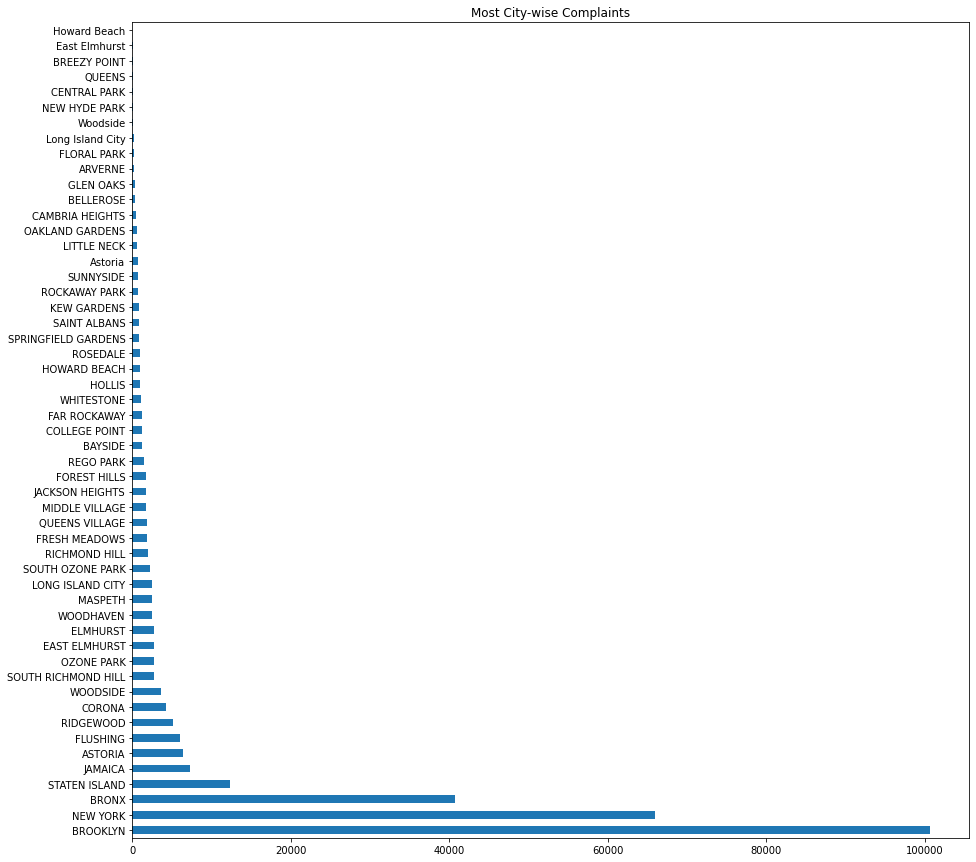

In [49]:
#Drawing a frequency plot for city-wise complaints
(df['City'].value_counts()).plot(kind = 'barh', figsize = (15,15), title = 'Most City-wise Complaints')

### Draw scatter and hexbin plots for complaint concentration across Brooklyn

(-74.08561051628611, -73.79949620371389, 40.556961642, 40.877267738)

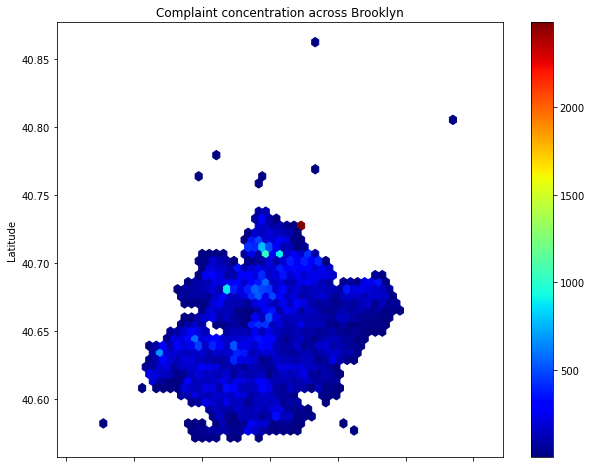

In [50]:
df_Brooklyn = df[df['City'] == 'BROOKLYN']
df_Brooklyn.plot(kind='hexbin', x = 'Longitude', y = 'Latitude', gridsize = 50, colormap = 'jet', mincnt = 1, 
                 title = 'Complaint concentration across Brooklyn', figsize = (10,8)).axis('equal')

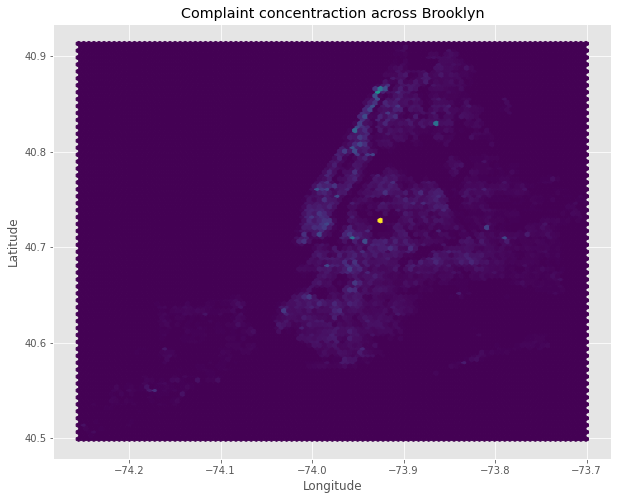

In [51]:
x_axis = df['Longitude']
y_axis = df['Latitude']
style.use('ggplot')
plt.figure(figsize = (10,8))
plt.hexbin(x_axis, y_axis)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Complaint concentraction across Brooklyn')
plt.show()

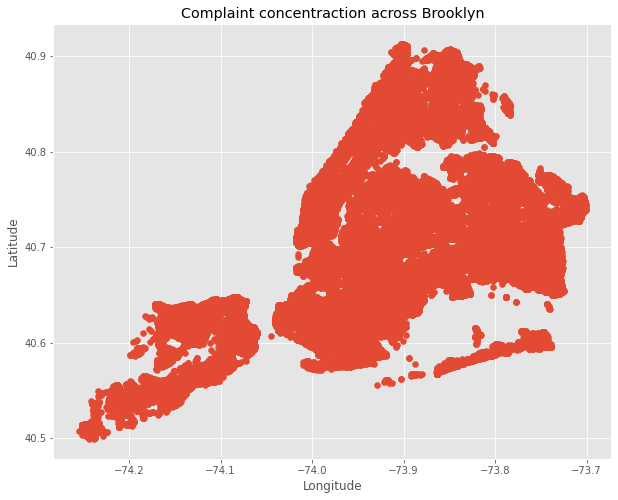

In [52]:
x_axis = df['Longitude']
y_axis = df['Latitude']
style.use('ggplot')
plt.figure(figsize = (10,8))
plt.scatter(x_axis, y_axis)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Complaint concentraction across Brooklyn')
plt.show()

### 3. Find major types of complaints:

### Plot a bar graph of count vs. complaint types

<AxesSubplot:title={'center':'Complaint Types'}>

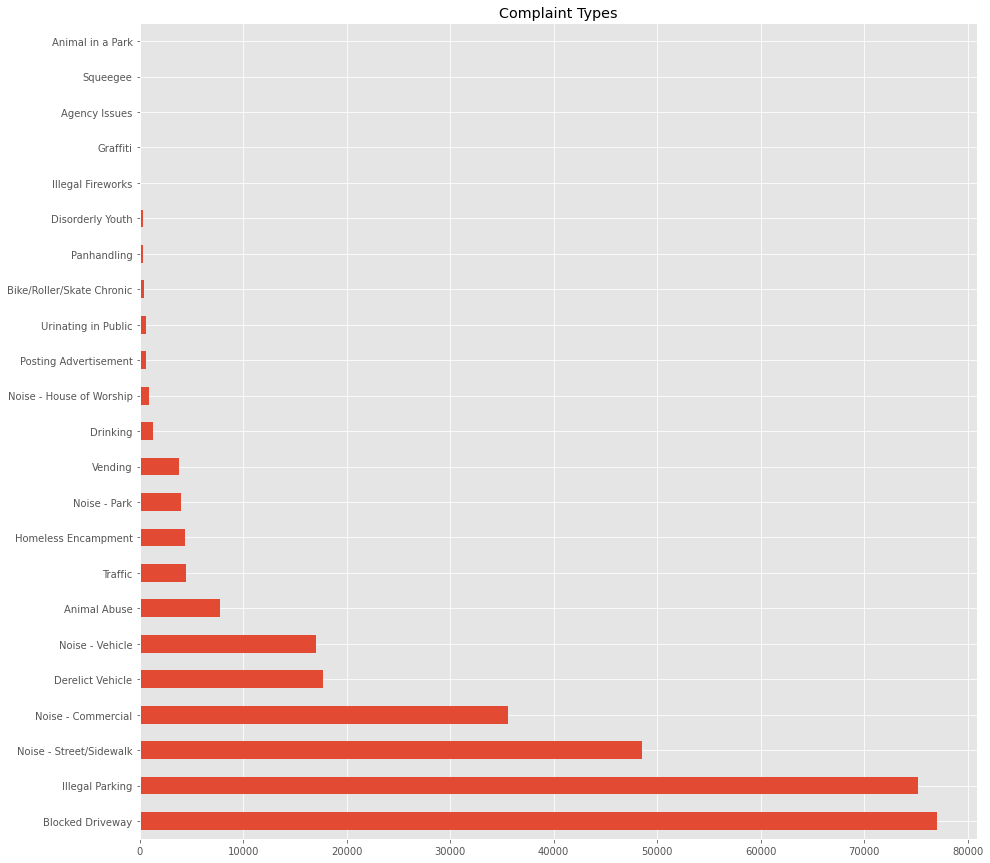

In [53]:
(df['Complaint Type'].value_counts()).plot(kind = 'barh', figsize = (15,15), title = 'Complaint Types')

### Find the top 10 types of complaints

In [54]:
df['Complaint Type'].value_counts().head(10)

Blocked Driveway           77009
Illegal Parking            75211
Noise - Street/Sidewalk    48573
Noise - Commercial         35547
Derelict Vehicle           17689
Noise - Vehicle            17078
Animal Abuse                7776
Traffic                     4497
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

In [55]:
df['Complaint Type'].head(10)

0    Noise - Street/Sidewalk
1           Blocked Driveway
2           Blocked Driveway
3            Illegal Parking
4            Illegal Parking
5            Illegal Parking
6            Illegal Parking
7           Blocked Driveway
8            Illegal Parking
9           Blocked Driveway
Name: Complaint Type, dtype: object

<AxesSubplot:title={'center':'Top 10 Complaint Types'}>

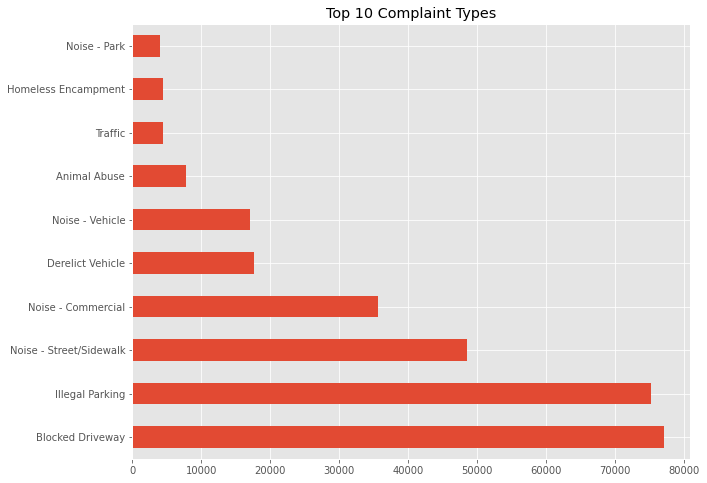

In [56]:
(df['Complaint Type'].value_counts()).head(10).plot(kind = 'barh', figsize = (10,8), title = 'Top 10 Complaint Types')

### Display the types of complaints in each city in a separate dataset

In [57]:
print(df.groupby(['City', 'Complaint Type']).size())

City      Complaint Type         
ARVERNE   Animal Abuse                38
          Blocked Driveway            35
          Derelict Vehicle            27
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            11
          Derelict Vehicle             2
          Illegal Parking            100
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Length: 765, dtype: int64


### 4. Visualize the major types of complaints in each city

<AxesSubplot:title={'center':'Major Type of complaints in each city'}>

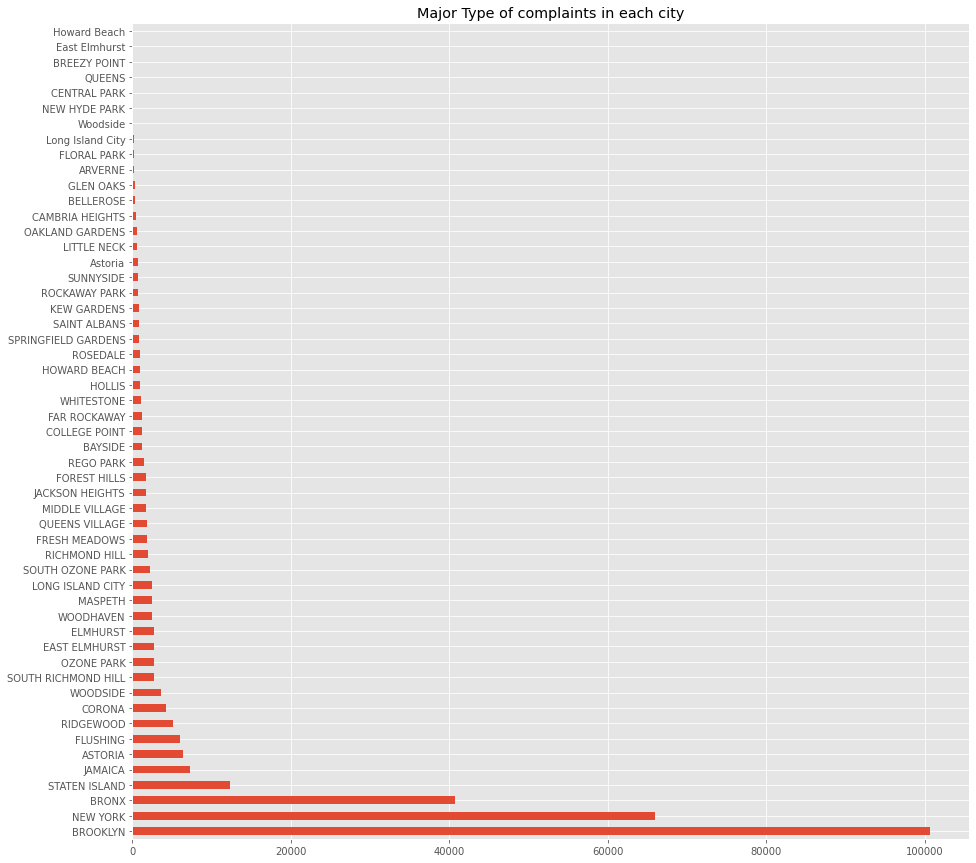

In [58]:
(df['City'].value_counts()).plot(kind = 'barh', figsize = (15,15), title = 'Major Type of complaints in each city')

<AxesSubplot:title={'center':'Major Types of Complaints in each city'}, ylabel='Complaint Type,City'>

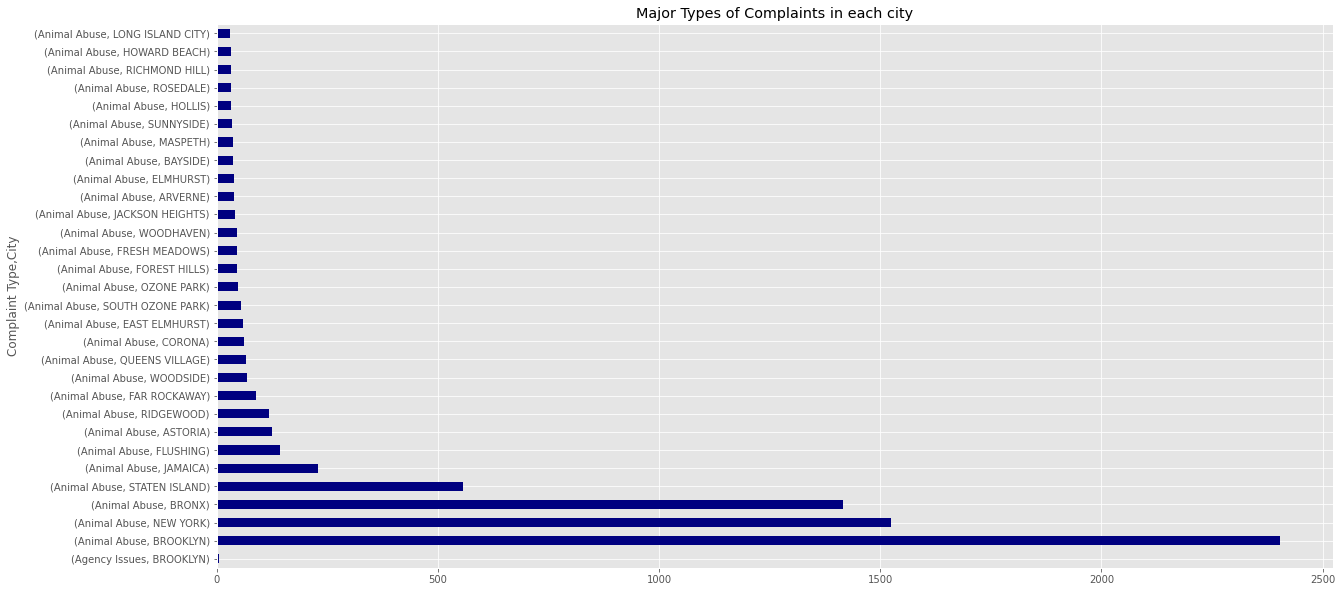

In [59]:
#df_major_complaints = df[df['City'] == 'BROOKLYN']
df_comp = df.groupby(['Complaint Type'])
df_comp['City'].value_counts().head(30).plot(kind='barh', colormap = 'jet', 
                 title = 'Major Types of Complaints in each city', figsize = (20,10))

### 5. Check if the average response time across various types of complaints

In [60]:
print("Shape before:", df.shape)
df['Resolution_Time'] = (df['Closed Date'] - df['Created Date']).dt.days
print("Shape after:", df.shape)

Shape before: (300400, 16)
Shape after: (300400, 17)


In [61]:
df.groupby(['City', 'Complaint Type', 'Resolution_Time']).size()

City      Complaint Type           Resolution_Time
ARVERNE   Animal Abuse             0                  38
          Blocked Driveway         0                  35
          Derelict Vehicle         0                  27
          Disorderly Youth         0                   2
          Drinking                 0                   1
                                                      ..
Woodside  Derelict Vehicle         0                   2
          Illegal Parking          0                  99
                                   1                   1
          Noise - Commercial       0                   2
          Noise - Street/Sidewalk  0                   5
Length: 1884, dtype: int64

In [62]:
#Average resolution time
df.groupby('Complaint Type')['Resolution_Time'].mean()

Complaint Type
Agency Issues                 0.000000
Animal Abuse                  0.112269
Animal in a Park             14.000000
Bike/Roller/Skate Chronic     0.155294
Blocked Driveway              0.283668
Derelict Vehicle              0.707841
Disorderly Youth              0.003497
Drinking                      0.120595
Graffiti                      0.061947
Homeless Encampment           0.011096
Illegal Fireworks             0.005952
Illegal Parking               0.970736
Noise - Commercial            1.017920
Noise - House of Worship      0.301826
Noise - Park                  0.524740
Noise - Street/Sidewalk       1.163980
Noise - Vehicle               0.354608
Panhandling                   0.745928
Posting Advertisement         0.200000
Squeegee                      0.000000
Traffic                       0.024016
Urinating in Public           0.008446
Vending                       0.244871
Name: Resolution_Time, dtype: float64